<a href="https://colab.research.google.com/github/sjosk/CASA0018_Deep-Learning-for-Sensor-Networks/blob/main/Week2/CASA0018_2_1_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Which Image
This example is based on the [TensorFlow tutorial in this video](https://youtu.be/j-35y1M9rRU?t=191) (note: start at 3min 11sec) to train a neural network to recognize items of clothing from a common dataset called Fashion MNIST.

You can learn more about the Fashion NMIST dataset [here](https://github.com/zalandoresearch/fashion-mnist). It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. The NMIST character dataset which inspired this one can be found [here](http://yann.lecun.com/exdb/mnist/).

# Importing dependencies
Let's start by importing TensorFlow, printing out the version number and create an object that points to the Fashion MNIST data via the tf.keras datasets API. How did we know where the dataset was? TensorFlow Datasets provide a list of resources that are easily accessible in the Colabs - a catalogue of what is availabe is at: https://www.tensorflow.org/datasets/catalog/overview)


In [1]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist

2.15.0



# Loading the image data
Calling **load_data** on the **mnist** object will give you two sets of lists, these will be the training and testing values for the graphics that contain the clothing items and their labels. They are 60000 and 10000 images in size by default.

Note: that is 85% and 15% split. And why no validation data? What happened to the 60-20-20 split we heard earlier? How does the function know which is training and which is test? [70-15-15 | pre-sorted]


In [2]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Exploring the data and preparing it for use
What does these values look like? We are going to import a library that helps us display an image and point it to a training image, and a training label to see. Experiment with different indices in the array.


shape: (28, 28)
Label: 0


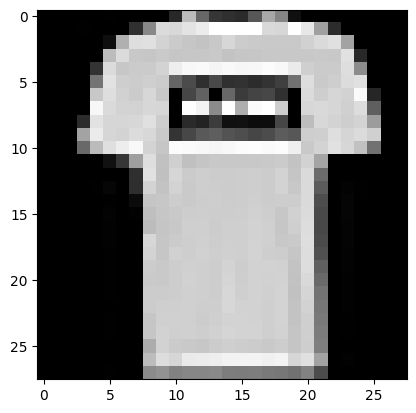

In [30]:
sample = 1;
print("shape:", training_images[sample].shape)

import matplotlib.pyplot as plt
plt.imshow(training_images[sample], cmap='gray')
print("Label:", training_labels[sample])


Each of the 'pixel' values above are between 0 (black) and 255 (white).

To '**normalize**' the data between 0 and 1, in Python we just need to divide all values by 255.0:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Building the model
To create the sequence of layers in a model we use  '**Sequential**'. The model has 3 layers.


1. First layer is called '**Flatten**' which takes the square image (28x28 pixels) and turns it into a 1 dimensional set.
2. The second layer '**Dense**' has 128 neurons.
3. The 3rd layer '**Dense**' has 10 neurons. Note the input to the model is a 28x28 image and the output is one of 10 neurons which relates to the 10 fashion categories.

The activition functions are code that runs when the model is training -


1.   '**relu**' (Rectified Linear Unit - ReLU) converts any negative value to zero (to keep us between 0 and 1),
2.   '**softmax**' looks at all the probabilities in that layer of neurons and sets the highest value to 1 and all the others to 0 - this makes it programatically easier to find the most likely solution.


In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

After defining the model we build it by compiling with an optimizer and loss function (we will cover these more in a later lecture) and then you train it by calling **model.fit** to fit your training data to your training labels.

In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5004 - accuracy: 0.8254
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3764 - accuracy: 0.8642
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3399 - accuracy: 0.8758
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3159 - accuracy: 0.8851
Epoch 5/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2973 - accuracy: 0.8904
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2827 - accuracy: 0.8960
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2717 - accuracy: 0.8987
Epoch 8/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2578 - accuracy: 0.9036


The accuracy value at the end of the final epoch is about 0.90 or about 90% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 90% of the time.

Next we can call '**model.evaluate**', and pass in the test data, and it will report back the loss for each. Let's give it a try:

In [8]:
#print("Batch Size = ",  60000 / 1875)
#model.summary()


In [9]:
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8789


[0.3485043942928314, 0.8788999915122986]

For me, that returned a accuracy of about .8731, which means it was about 87% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  



---
# Exercises - Check your knowledge

(Labs based on material from Tensorflow tutorials)


#Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [10]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[1.6501012e-06 4.4702654e-07 1.5574573e-06 2.4640775e-08 2.6601151e-07
 4.3303046e-02 8.6977201e-07 1.2355233e-01 1.4297423e-05 8.3312559e-01]


If you add some number formatting does that make it clearer?

In [21]:
for x in classifications[0]:
  print("{:0.8f}".format(x))

0.00000165
0.00000045
0.00000156
0.00000002
0.00000027
0.04330305
0.00000087
0.12355233
0.00001430
0.83312559


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does?

In [25]:
print(test_labels[0])

9


Try running it again with the next test image in the test data set:

In [33]:
print(classifications[1])
for x in classifications[1]:
  print("{:0.8f}".format(x))
print(test_labels[1])

[3.5627575e-06 4.9068865e-13 9.9819869e-01 3.3253972e-11 1.3200949e-03
 4.4346198e-12 4.7763251e-04 1.2978490e-13 1.0664252e-10 4.3094987e-13]
0.00000356
0.00000000
0.99819869
0.00000000
0.00132009
0.00000000
0.00047763
0.00000000
0.00000000
0.00000000
2


### Question 1a What does this list represent? Choose the best answer below.


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes



###Question 1b How do you know that this list tells you that the item is an ankle boot?  Choose the best answer below.


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list




# Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?



In [35]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten()),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
for x in classifications[0]:
  print("{:0.8f}".format(x))
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4731 - accuracy: 0.8304
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3562 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3224 - accuracy: 0.8805
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2963 - accuracy: 0.8898
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[3.5799985e-06 6.3362897e-09 2.4028134e-07 3.6303340e-09 6.8950794e-07
 5.5223540e-03 1.3418418e-06 2.5299441e-02 6.0263242e-06 9.6916640e-01]
0.00000358
0.00000001
0.00000024
0.00000000
0.00000069
0.00552235
0.00000134
0.02529944
0.00000603
0.96916640
9


###Question 2. Increase to 1024 Neurons -- What's the impact - which of the answers below is correct?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


# Exercise 3:

What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [39]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5117
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3941
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3538
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3301
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[9.3245399e-07 2.5769935e-09 9.7312159e-07 3.9118618e-07 4.5758554e-07
 1.0005660e-02 7.9119962e-07 3.6366025e-03 1.0726743e-05 9.8634350e-01]
9


# Exercise 4:

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [41]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5125
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3878
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3526
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3288
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[2.8899400e-05 5.1541127e-10 2.2396453e-07 6.4776593e-08 1.6832820e-07
 7.4707414e-03 4.6272853e-05 1.0934963e-01 7.0794449e-05 8.8303310e-01]
9


# Exercise 5:

Consider the effects of additional layers in the network.

### Question 5: What will happen if you add another layer between the one with 512 and the final layer with 10?

In [42]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4659
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3567
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3169
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2961
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.1859476e-06 6.8950715e-07 7.9101667e-08 2.4160803e-07 2.1838963e-07
 1.4288080e-02 2.4323145e-07 7.5132594e-02 2.4606913e-06 9.1057414e-01]
9


# Exercise 6:

Consider the impact of training for more or less epochs. Why do you think that would be the case?

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5

Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of 'overfitting' and it's something you need to keep an eye out for when training neural networks.

In [43]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.15.0
Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5057 - accuracy: 0.8243
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3783 - accuracy: 0.8627
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3390 - accuracy: 0.8762
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3156 - accuracy: 0.8845
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2968 - accuracy: 0.8908
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2800 - accuracy: 0.8960
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2672 - accuracy: 0.9012
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2582 - accuracy: 0.9043
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2467 - accuracy: 0.9083
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss

#Exercise 7:

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [44]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.7104 - accuracy: 0.7629
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5400 - accuracy: 0.8203
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5047 - accuracy: 0.8294
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4920 - accuracy: 0.8349
Epoch 5/5
313/313 [==============================] - 1s 1ms/step
[4.8018692e-15 6.0819183e-11 4.1090598e-22 1.8550237e-09 1.2677538e-19
 8.8729933e-02 1.5341952e-16 8.1464797e-02 3.4619871e-09 8.2980531e-01]
9


Still works but, normalizing the data generally speeds up learning and leads to faster convergence.

#Exercise 8:

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....

So how would you fix that? Like any other program...you have callbacks! See them in action in the example below.

In [45]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])




2.15.0
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5054 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3782 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3379 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3155 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2952 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2831 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2718 - accuracy: 0.8995
Epoch 8/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.2607 - accuracy: 0.9026
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2607 - accuracy: 0.9027


# Answers

#### Q1a
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 9, the probability was .988+, i.e. the neural network is telling us that it's almost certainly a 9.

#### Q1b
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

#### Q2
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

#### Q5
There isn't a significant impact -- because this is relatively simple data. For far more complex data (e.g. color images to be classified as flowers), extra layers are often necessary.
